In [1]:
import pandas as pd
import csv
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

In [2]:
# Read in the data
data = pd.read_csv("finalstats.csv")

# shuffle the rows
data = data.sample(axis=0, frac=1.0)

In [3]:
# our targets
y = data["PTS"].values

# build the feature matrix
X = data
X[np.isnan(X)] = np.nanmean(X)

# set the train and test values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()

# Normalize the input data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
"""Base line Knn - Knn without any data processing and hyperparameter tuning"""
knn_baseline = make_pipeline(KNeighborsClassifier())
knn_baseline.fit(X_train, y_train)
print("The score of the baseline Knn model is: ", knn_baseline.score(X_test, y_test))
baseknn_pred = knn_baseline.predict(X_test)
y_score_baseline = knn_baseline.fit(X_train, y_train).predict_proba(X_test)

The score of the baseline Knn model is:  0.03431952662721893


In [5]:
strategies=["most_frequent", "stratified"]

for strategy in strategies:
    dummy_clf = DummyClassifier(strategy = strategy)
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    mse = mean_absolute_error(y_test, y_pred)
    print('Precision:', precision)
    print("Mean Error: ", math.sqrt(mse))
    print('Recall:', recall)
    print('F1 score:', f1)
    print("The score of the baseline", strategy, "dummy model is:", dummy_clf.score(X_test, y_test))
#dummy_pred = dummy_clf.predict(test_images)
y_score_dummy = dummy_clf.fit(X_train, y_train).predict_proba(X_test)

Precision: 0.0010980007702811527
Mean Error:  2.809325131113822
Recall: 0.033136094674556214
F1 score: 0.0021255685014606503
The score of the baseline most_frequent dummy model is: 0.033136094674556214
Precision: 0.027488563504922712
Mean Error:  3.276236836776439
Recall: 0.02485207100591716
F1 score: 0.025418932399661667
The score of the baseline stratified dummy model is: 0.02485207100591716


/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_pr

In [14]:
"""
Primary Knn Implementation with pipeline and gridsearch for data-preprocessing and hyperparameter tuning
"""

knn_pipe = Pipeline([
    ('data_scaling', StandardScaler()),
    ('feature_selection', SelectPercentile(f_classif)),
    ('knn_classifier', KNeighborsClassifier(n_jobs = -1))
])

knn_paramgrid = {
    'data_scaling': [MinMaxScaler(), StandardScaler()],
    'feature_selection__percentile': [100, 75, 50, 25, 10], 
    'knn_classifier__n_neighbors': [3, 5, 7, 9],
    'knn_classifier__weights': ['uniform', 'distance']
}

knn_model = GridSearchCV(knn_pipe, knn_paramgrid, cv = 5, n_jobs = -1)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/featur

The score of the primary KNN model is:  0.2710059171597633
The model's best parameters are:  {'data_scaling': MinMaxScaler(), 'feature_selection__percentile': 10, 'knn_classifier__n_neighbors': 3, 'knn_classifier__weights': 'distance'}
Mean Squared Error:  2.434952583283756
Mean Absolute Error:  1.5692307692307692
Precision: 0.28729528579430785
Recall: 0.2710059171597633
F1 score: 0.26887167496002706
[]


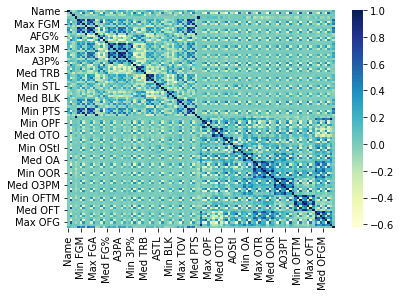

In [15]:
print("The score of the primary KNN model is: ", knn_model.score(X_test, y_test))
print("The model's best parameters are: ", knn_model.best_params_)
print("Mean Squared Error: ", math.sqrt(mse))
print("Mean Absolute Error: ", mae)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
corr = data.corr()

# Create the heatmap using Seaborn
sns.heatmap(corr, cmap="YlGnBu")

avg_corr = np.mean(corr.values)

drop_features = [col for col in data.columns if np.abs(corr[col]).mean() < avg_corr]
print(drop_features)

In [12]:
df = pd.read_csv('finalstats1.csv')
name_id_map = {}
id_counter = 1

for name in df['Name'].unique():
    name_id_map[name] = id_counter
    id_counter += 1
        
print(name_id_map, '\n')

with open('team_defensive_stats.csv', 'r') as ids_file:

    # Create a dictionary of IDs and opponent strings from the IDs file
    teams = {}
    ids_reader = csv.reader(ids_file)
    for row in ids_reader:
        teams[row[1]] = row[0]
        
print(teams)

{'Aaron Gordon': 1, 'Anthony Edwards': 2, 'Bam Adebayo': 3, 'Bradley Beal': 4, 'Brook Lopez': 5, 'CJ McCollum': 6, 'Damian Lillard': 7, 'Darius Garland': 8, "De'Aaron Fox": 9, 'DeMar DeRozan': 10, 'Dejounte Murray': 11, 'Desmond Bane': 12, 'Devin Booker': 13, 'Domantis Sabonis': 14, 'Donovan Mitchell': 15, 'Draymond Green': 16, 'Evan Mobley': 17, 'Franz Wagner': 18, 'Ja Morant': 19, 'Jalen Brunson': 20, 'Jamal Murray': 21, 'James Harden': 22, 'Jarrett Allen': 23, 'Jayson Tatum': 24, 'Jimmy Butler': 25, 'Joel Embiid': 26, 'Jrue Holiday': 27, 'Julius Randle': 28, 'Kawhi Leonard': 29, 'Kevin Durant': 30, 'Kristaps Porzingis': 31, 'Kyrie Irving': 32, 'Lebron James': 33, 'Luka Doncic': 34, 'Mikal Bridges': 35, 'Pascal Siakam': 36, 'Paul George': 37, 'Shai Gilgeous-Alexander': 38, 'Stephen Curry': 39, 'Trae Young': 40, 'Tyrese Haliburton': 41, 'Zach Lavine': 42} 

{'Team': 'ID', 'ATL': '1', 'BRK': '2', 'BOS': '3', 'CHO': '4', 'CHI': '5', 'CLE': '6', 'DAL': '7', 'DEN': '8', 'DET': '9', 'GSW':

In [ ]:
input_data = pd.DataFrame({
    'Name': ['33'],
    'Opp': ['10'],
    'H/A': [1]
})

prediction = knn_model.predict(input_data)

print('Predicted points:', prediction[0])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(16, 12))
disp.plot(ax=ax)
plt.savefig('cm_knn.png', dpi=300)
plt.title('KNN Confusion Matrix')
plt.show()
cm.diagonal()/cm.sum(axis=1)

In [ ]:
diff = y_pred - y_test

bins = np.arange(-9, 13)
hist, _ = np.histogram(diff, bins=bins)
print(hist)

# Create a 2D histogram of the differences
hist, xedges, yedges = np.histogram2d(y_test, diff, bins=(np.arange(10, 30), np.arange(-7, 8)))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(hist.T, extent=extent, origin='lower')
plt.colorbar()
plt.xlabel('True Values')
plt.ylabel('Prediction Error')
plt.savefig('heatmap_knn.png', dpi=300)
plt.title('KNN Histogram Heat Map')
plt.show()

In [ ]:
plt.hist(diff, bins=20)

# Add labels and title
plt.xlabel("Prediction Error")
plt.ylabel("Amount")
plt.savefig('hist_knn.png', dpi=300)
plt.title("Histogram of Predictions")

# Show the plot
plt.show()

In [ ]:
data = data.loc[data['Name'] == name]
# our targets
y = data["PTS"].values

# build the feature matrix
X = data.drop(data.columns[0], axis=1)
X[np.isnan(X)] = np.nanmean(X)

predicted_points = knn_model.predict(X)
print(f"{name} is predicted to score {predicted_points} points against {teams.get(opponent)}")